## Exploraton of UMAP 
An a comparison with PCA for dimensionality reduction, visulaization and density-based clustering

In [1]:
import umap
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#for clustering, see https://hdbscan.readthedocs.io/en/latest/index.html for details
import hdbscan

/Users/robertmartin-short/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/robertmartin-short/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#See https://ipyvolume.readthedocs.io/en/latest/index.html
import ipyvolume as ipv

In [4]:
#See https://github.com/dunovank/jupyter-themes
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='oceans16',context='talk', fscale=1.4, spines=False, gridlines='--')
%matplotlib inline

In [5]:
%%time
#https://www.openml.org/d/554
mnist = fetch_openml('mnist_784')

CPU times: user 19.7 s, sys: 647 ms, total: 20.3 s
Wall time: 20.9 s


In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
np.unique(mnist.target)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [17]:
def plot_dataset_decomp(embedding,title):
    
    '''Plot a dataset that has been reduced to 2D'''
    
    fig, ax = plt.subplots(figsize=(12, 10))
    color = mnist.target.astype(int)
    plt.scatter(
        embedding[:, 0], embedding[:, 1], c=color, cmap=plt.cm.get_cmap('rainbow', 10), s=0.8
    )
    plt.title(title, fontsize=18)
    plt.colorbar()

## Fit 2D PCA 

In [9]:
%%time
pca = PCA(n_components=2).fit(mnist.data)
pca_embedding = pca.transform(mnist.data)

CPU times: user 2.74 s, sys: 427 ms, total: 3.17 s
Wall time: 2.3 s


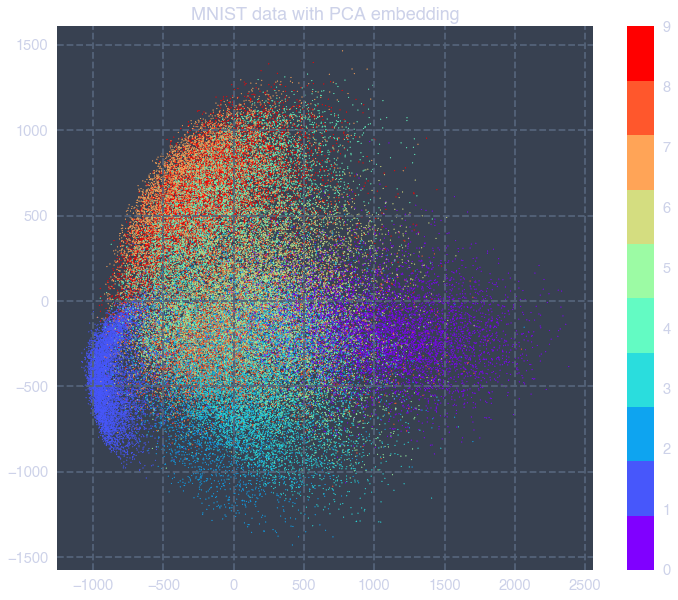

In [32]:
plot_dataset_decomp(pca_embedding,"MNIST data with PCA embedding")

In [11]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

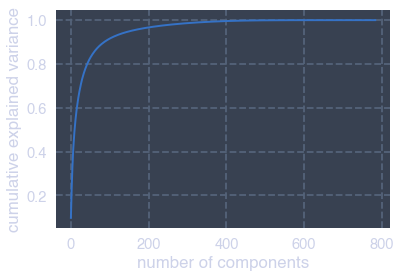

In [12]:
pca = PCA().fit(mnist.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Fit 2D UMAP to mnist data

In [13]:
%%time 
umap_fit = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric="euclidean"
).fit(mnist.data)

CPU times: user 8min 52s, sys: 3.15 s, total: 8min 55s
Wall time: 8min 54s


In [14]:
umap_embedding = umap_fit.transform(mnist.data)

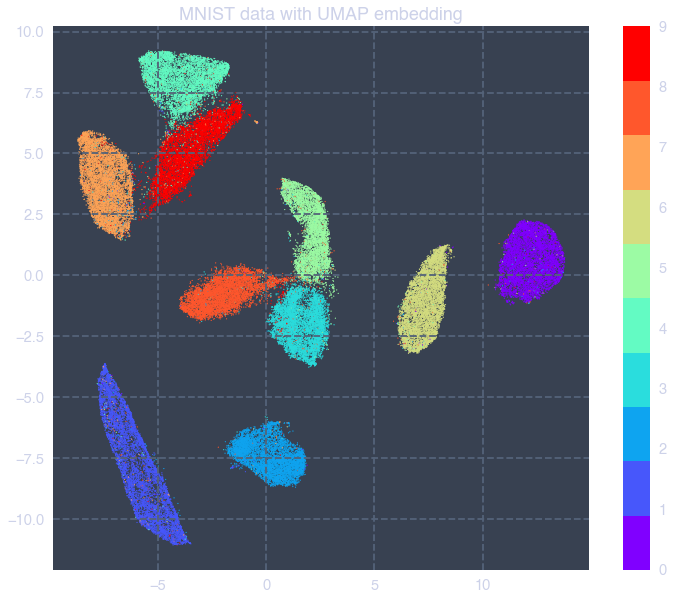

In [31]:
plot_dataset_decomp(umap_embedding,"MNIST data with UMAP embedding")

## Fit 3D UMAP to mnist data

First we sample ~10% of the original dataset, which makes the interactive plot easier to navigate

In [26]:
sampled_mnist = mnist.data[np.random.choice(np.arange(len(mnist.data)),size=int(0.1*len(mnist.data)))]

In [27]:
umap_fit_3D = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=3,
    metric="euclidean"
).fit(sampled_mnist)

In [29]:
umap_embedding_3D = umap_fit_3D.transform(sampled_mnist)

In [30]:
ipv.quickscatter(umap_embedding_3D[:,0], umap_embedding_3D[:,1], umap_embedding_3D[:,2], size=1, marker="sphere")

## Choose parameters for optimal density-based clustering

We want to choose a larger n-neighbors to ensure coherent clusters, and a smaller min_dist because density is used by the clustering algorithm

In [ ]:
%%time
umap_fit_cluster = umap.UMAP(
    n_neighbors=50,
    min_dist=0,
    n_components=2,
    metric="euclidean"
).fit(mnist.data)

umap_embedding_cluster = umap_fit_cluster.transform(mnist.data)